In [3]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:02m


In [3]:
!pip install tensorflow

In [1]:
!pip install --upgrade tensorrt

  Using cached tensorrt-8.6.1.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1-py2.py3-none-any.whl size=16971 sha256=48022d6b8bdbc09cb6914e68676752cb36ef795e9ccfa740350a0d3cc1c67806
  Stored in directory: /home/rently/.cache/pip/wheels/41/7f/91/ae0ef00bdb99c40588208f7475ccea612e5c82921629c1a263
Successfully built tensorrt


In [3]:
import tensorrt
print(tensorrt.__version__)
#assert tensorrt.Builder(tensorrt.Logger())

8.6.1


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-08-02 14:46:49.148502: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-02 14:46:49.150519: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 14:46:49.190476: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 14:46:49.191082: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 14:46:49.861824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [5]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train,y_train,epochs=10)
model.save('handwritten.model')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9901
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9918
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0253 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9942
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0176 - accuracy: 0.9950
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0175 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0167 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

INFO:tensorflow:Assets written to: handwritten.model/assets


In [10]:
model=tf.keras.models.load_model('handwritten.model')
loss,accuracy=model.evaluate(x_test,y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 0s 946us/step - loss: 0.1258 - accuracy: 0.9757
0.1257714480161667
0.9757000207901001


1/1 [==============================] - 0s 55ms/step
The entered digit is probably 1


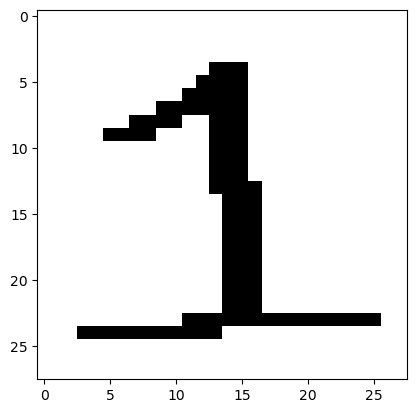

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 2


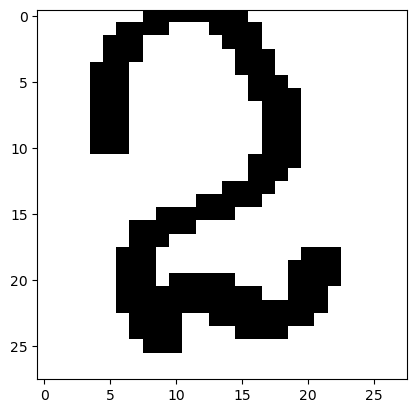

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 3


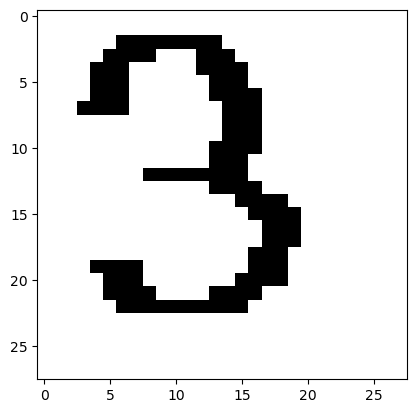

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 4


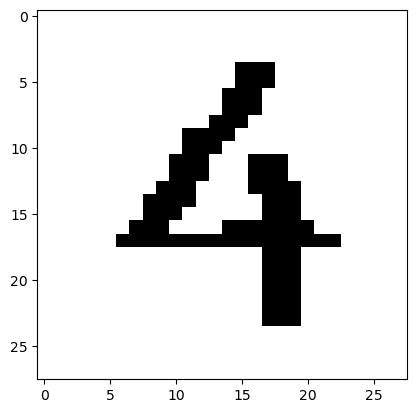

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 3


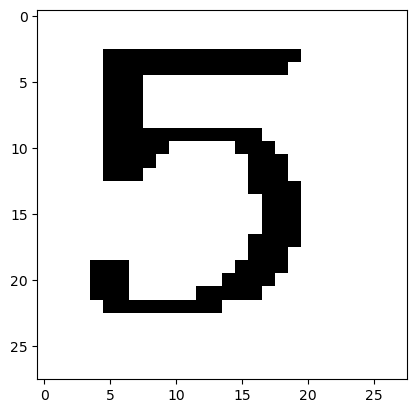

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 6


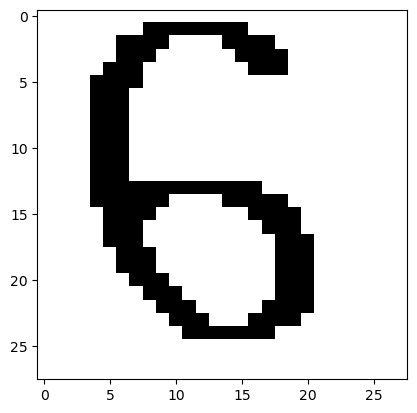

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 4


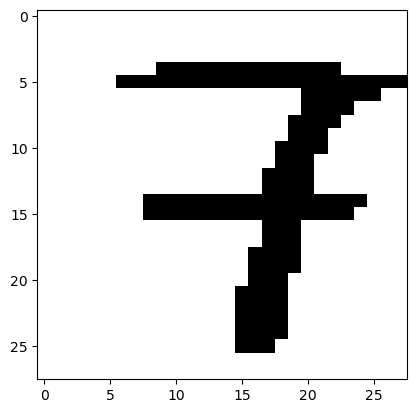

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 3


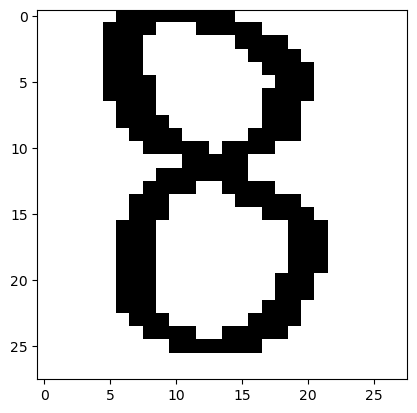

1/1 [==============================] - 0s 15ms/step
The entered digit is probably 5


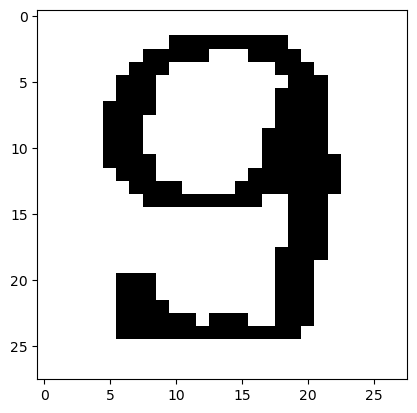

In [11]:
image_num=1
while os.path.isfile(f"digits/digit{image_num}.png"):
    try:
        img=cv2.imread(f"digits/digit{image_num}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print(f"The entered digit is probably {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_num+=1